# 商业数据分析实战（酒卷隆志/里洋平）——第四章案例 B—交叉列表统计什么样的顾客会选择离开
&#160; &#160;**案例提要：社交游戏的用户流失分析**  
&#160; &#160;和上月相比，本月《黑猫拼图》游戏的用户数减少了很多，和上月相比，本月的商业宣传和月度活动并无大的变化。因此，我们需要调查用户数大量减少的原因并改善这种状况，我们该怎么做呢？

[TOC]

In [1]:
# 加载python所需模块
import pandas as pd
import pandasql
import numpy as np #之后需要用到
import seaborn as sns
import matplotlib as mpl #设置环境变量
import matplotlib.pyplot as plt #绘图专用
from mpl_toolkits.mplot3d import Axes3D #绘制3D图
mpl.rcParams['font.sans-serif'] = ['FangSong']
mpl.rcParams['axes.unicode_minus']=False

## 现状和预期
&#160; &#160;《黑猫拼图》游戏从发布到现在已经有一年零三个月了。在游戏刚发布时，用户数大量增加，其中大部分是游戏发布前就已经注册的用户。然而，几周后的一次严重的程序问题导致了用户流失。又过了一个月，由于投放的广告发挥了作用，用户数量再次增加，而后这些新的用户又逐渐流失。虽然用户数在短期内经常反复地上下波动，但从按月统计的数据来看，在游戏发布后的半年时间里，用户数保持了上升的势头。而这之后的 8 个月时间，游戏的用户数也一直维持之前的水平。  
&#160; &#160;然而，从这个月开始，用户数开始大量减少。因为《黑猫拼图》游戏是公司具有代表性的成功应用，所以这次用户数减少的问题也备受关注。  
&#160; &#160;广告部的负责人表示：“和上个月相比，商业推广活动无论是从内容上还是从数量上来看都没有发生变化。”  
&#160; &#160;游戏企划部的负责人也表示：“每月开展的游戏活动并没有什么大的差异。”  
&#160; &#160;因此，社交游戏事业部的部长向数据分析部门下达了指示：“调查清楚用户数量减少的原因，并尽全力改善这种状况。”  



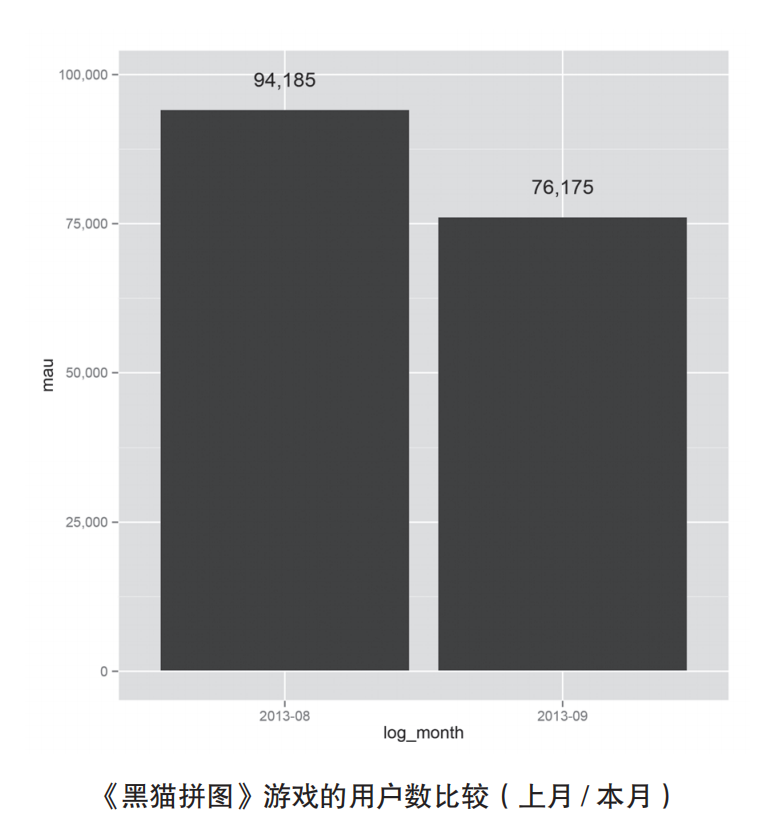

&#160; &#160;一般说来，无论是什么课题，数据分析的负责人首先需要做的就是明确问题现状和预期。本例中同样需要首先分析现状和预期。  
&#160; &#160;首先，我们面临的现状是“和上月相比，本月的用户数减少了”。在本例中，我们的目标是查清用户数减少的原因，并确保和上月相同的用户数。那么，下一步要做的就是通过数据分析查清原因，并明确所需要解决的问题。

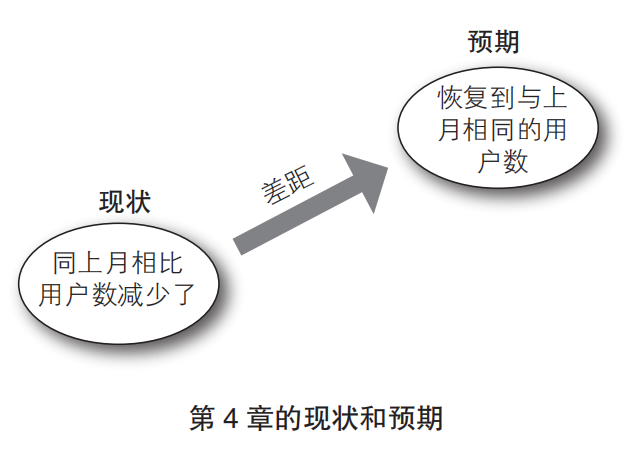

## 发现问题
&#160; &#160;同样，在第 4 章中，为了明确现状和预期之间差距的结构，我们需要首先思考上月和本月有哪些不同的地方。在发现问题的阶段，重要的是从大而广的视角出发来考虑各种可能性。例如，我们可以尝试做出如下假设。  
&#160; &#160;1. 商业推广上存在问题，流失的用户数超过了新增的用户数  
&#160; &#160;2. 每月不同主题的游戏活动开始变得很无聊，用户都不爱玩了  
&#160; &#160;3. 按用户的性别或者年龄段等属性来划分用户群，可能是其中某个用户群出现了问题  
&#160; &#160;做出上述假设后，应尽可能地在短时间内大致验证一下。我们通过咨询市场部和游戏开发部，得到了下述信息。  
&#160; &#160;1. 同上月相比，商业推广的力度大体没变，新增用户数也大致保持在相同的水平  
&#160; &#160;2. 开展的各种游戏活动同上月相比几乎没有变化  
&#160; &#160;因此，只剩下第 3 条假设“可能是其中某个用户群出现了问题”没能得到验证了。也就是说，并没有发现现有问题是由第 1 条或第 2 条假设造成的。再进一步深挖假设的内容，可以知道用户群通常是按照性别、年龄段等来划分的。于是，首先我们可以考虑是否有某个属性的用户群数量减少了，然后通过和上月的数据加以比较，确认用户数量减少了的用户属性，并思考如何恢复用户数量。  

## 数据的收集和加工

### 探讨分析所需的数据
&#160; &#160;在确定了分析的主题后，就需要探讨一下分析所需的数据了。  
&#160; &#160;这次的用户群分析到底需要哪些数据呢？本案例中我们提出的假设如下所示。  
**问　题**  
&#160; &#160;**● 和上月相比，用户数量减少了 （事实）**  
&#160; &#160;**● 某个用户群出现了问题 （假设）**  
**解决方案**  
&#160; &#160;**● 针对用户数量减少了的用户群采取相应的措施，使用户数量回到和上月相同的水平**  
&#160; &#160;基于这个假设，让我们整理一下分析的过程。  
&#160; &#160;**1.《黑猫拼图》游戏的用户数量相比上月减少了 （事实）**  
&#160; &#160;**2. 某些用户群的用户数量减少了 （假设）**  
&#160; &#160;**3. 针对该用户群制定相应的措施，使用户数量回到和上月相同的水平 （解决方案）**  
&#160; &#160;为了完成这个方案，需要调查一下《黑猫拼图》游戏的销售额构成。  
&#160; &#160;在上一章中，针对销售额减少的问题，我们猜测原因可能是商业宣传活动减少了，并在随后的数据分析中验证了上述猜测是否正确。这种分析方式称为“验证型数据分析”。而在本章中，我们只知道“存在问题”，却无法轻易找到原因。也就是说，本例中无法事先猜测问题出现的原因，而是需要通过数据分析来探索原因所在，这种方式称为“探索型数据分析”。从其他行业的数据分析师口中也了解到，不管什么企业，对“探索型数据分析”和“验证型数据分析”的需求大约各占一半。本章将主要关注占二分之一的“探索型数据分析”。  
&#160; &#160;为了能够通过数据明确问题，我们需要下面的数据。  
&#160; &#160;● DAU（Daily Active User，每天至少来访 1 次的用户数据）  
&#160; &#160;● user_info（用户属性数据）  
**● DAU**  

| 数据内容 | 数据类型 | 语言中的标识 | 
| - | :-: | -: | 
| 访问时间 | string（字符串） | log_data | 
| 应用名称 | string（字符串） | app_name |
| 用户 ID | int（数值） | user_id|  

**● user_info**

| 数据内容 | 数据类型 | 语言中的标识 | 
| - | :-: | -: | 
| 首次使用日期 | string（字符串） | install_data | 
| 应用名称 | string（字符串） | app_name |
| 用户 ID | int（数值） | user_id|
| 性别（女性、男性） | string（字符串） |  gender |
| 年龄段（10、20、30、40、50） | int（数值） |  generation |
| 设备类型（iOS、Android） | string（字符串） |  device_type |

&#160; &#160;这里的数据基本都来自于日志，即使没有数据分析的需求，每天也都持续积累着。  
&#160; &#160;总之我们已经确定了需要分析哪些数据，下一步就该考虑如何收集这些数据了。本次的情况和上一章一样，所有数据都存在服务器上，只需将其读入处理即可。

**● DAU**

In [3]:
dau = pd.read_csv('../../data/section4-dau.csv')
dau.head(5)

,log_date,app_name,user_id
0,2013-08-01,game-01,33754
1,2013-08-01,game-01,28598
2,2013-08-01,game-01,30306
3,2013-08-01,game-01,117
4,2013-08-01,game-01,6605


&#160; &#160;我们以第 1 行数据为例来介绍一下数据的内容。该行数据表示“2013 年 8 月 1 日 ID 为 33754 的用户访问了《黑猫拼图》游戏”。每天到访的用户 ID 都收集在这个数据中。

**● user.info**

In [5]:
user_info = pd.read_csv('../../data/section4-user_info.csv')
user_info.head(5)

,install_date,app_name,user_id,gender,generation,device_type
0,2013-04-15,game-01,1,M,40,iOS
1,2013-04-15,game-01,2,M,10,Android
2,2013-04-15,game-01,3,F,40,iOS
3,2013-04-15,game-01,4,M,10,Android
4,2013-04-15,game-01,5,M,40,iOS


&#160; &#160;接下来是 user.info 数据。这个数据集包含了首次使用日期、应用名称、用户 ID、性别、年龄段、所使用的手机终端类型这些用户属性数据。例如数据的第 1 行表示“在 2013 年 4 月 15 日，ID 为 1、年龄段在40~49 岁的男性用户使用 iOS 手机终端首次访问了《黑猫拼图》游戏”。

### 数据加工
&#160; &#160;在像本例这样探索原因的数据分析中，大多是将某个状态的数据（结果数据）和用户的属性信息（原因数据）合并起来，从而得知哪些属性（原因）可能导致哪种状态（结果）。因此我们将上述两种数据合并起来。

**● 把DAU数据和user.info数据合并起来**

In [6]:
dau_info = dau.merge(user_info, how='left', on=['user_id', 'app_name'])
dau_info.head(5)

,log_date,app_name,user_id,install_date,gender,generation,device_type
0,2013-08-01,game-01,33754,2013-08-01,M,20,iOS
1,2013-08-01,game-01,28598,2013-07-16,M,50,iOS
2,2013-08-01,game-01,30306,2013-07-20,F,30,iOS
3,2013-08-01,game-01,117,2013-04-17,F,20,iOS
4,2013-08-01,game-01,6605,2013-05-02,M,20,iOS


&#160; &#160;这里我们在 user.info 的属性数据中追加了 DAU 中各个用户的访问日期信息。这样一来，用户是否使用了该应用的信息和用户自身的属性信息都被归纳到了同一个数据表中。

## 数据分析
&#160; &#160;由于在之前的处理中，我们将包含用户访问情况的 DAU 数据和包含用户属性的 user.info 数据进行了合并，因此接下来就可以对上述数据  
&#160; &#160;进行因果关系的分析了。为了弄清楚哪种属性的用户群人数比上月减少了，我们对数据进行交叉列表统计，如果发现了可能是问题原因的属性，就将其可视化。进行因果关系的分析时，具体来说有以下几步。  
&#160; &#160;**1. 用户群分析（对每个用户群进行交叉列表统计）**  
&#160; &#160;**2. 将已明确的用户群数据可视化**  

### 对每个用户群进行交叉列表统计（用户群分析）

#### ● 用户群分析（性别）

In [44]:
# 增加登录月份列
dau_info['log_month'] = pd.to_datetime(dau_info['log_date']).map(lambda x : x.strftime('%Y-%m'))
# 把数据中的F变成女，M变成男
dau_info['性别'] = dau_info['gender'].replace({'F':'女','M':'男'})
# 求透视图
dau_info_pivot = pd.pivot_table(dau_info,index='log_month',columns='性别',values='user_id',aggfunc=np.count_nonzero)
dau_info_pivot


性别,女,男
log_month,,
2013-08,47343,46842
2013-09,38027,38148


&#160; &#160;通过上表就可以看出性别的影响。比较 2013 年 8 月和 9 月男女用户的数量，可以看出虽然整体上用户数量在下降，但用户的男女构成比例大体没有变化。由此可以判断性别属性对用户数量下降的影响很小。  
&#160; &#160;接着我们考虑年龄段属性的影响，并统计出各个年龄段用户数的变化情况。

#### ● 用户群分析（年龄段）

In [34]:
# 分桶出来的列是category类型的，这种类型有很多bug，画图、做透视图都会出错，要转成str类型
dau_info['年龄段'] = pd.cut(dau_info['generation'],np.arange(0,max(dau_info['generation'])+10*2,10),right=False).astype(str)
dau_info_pivot = dau_info.pivot_table(index='log_month',columns=['年龄段'],values='user_id',aggfunc=np.count_nonzero)
dau_info_pivot

年龄段,"[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)"
log_month,,,,,
2013-08,18785,33671,28072,8828,4829
2013-09,15391,27229,22226,7494,3835


&#160; &#160;通过比较 2013 年 8 月和 9 月的数据，我们可以看到无论是哪个年龄段，在整体用户数量中所占的比例都没有发生大的变化，也没有发现哪个年龄段的用户数大量减少了。这里我们需要再进一步细分，看看是否某个性别下的某个年龄段的用户数量减少了。也就是说，将性别和年龄段属性组合起来进行交叉列表统计。像这样将交叉列表统计的分析轴组合起来的方法称为 n 重交叉列表统计。这里我们将性别和年龄段组合起来，形成 2 重交叉列表统计。

#### ● 用户群分析（性别×年龄段）

In [45]:
dau_info_pivot = dau_info.pivot_table(index='log_month',columns=['性别','年龄段'],values='user_id',aggfunc=np.count_nonzero)
dau_info_pivot

性别               女                                            男           \
年龄段       [10, 20) [20, 30) [30, 40) [40, 50) [50, 60) [10, 20) [20, 30)   
log_month                                                                  
2013-08       9091    17181    14217     4597     2257     9694    16490   
2013-09       7316    13616    11458     3856     1781     8075    13613   

性别                                    
年龄段       [30, 40) [40, 50) [50, 60)  
log_month                             
2013-08      13855     4231     2572  
2013-09      10768     3638     2054

&#160; &#160;通过将性别和年龄段进行交叉组合，形成了 20~29 岁女性、30~39岁女性等新的分析轴。通过观察统计数据，我们发现各个用户群的用户数量整体都下降了，但每个用户群所占的比例大体没变，也没有发现哪个用户群的数量急剧下降。  
&#160; &#160;下面我们需要考虑的是用户所使用的设备的差异。

#### ● 用户群分析（设备）

In [48]:
dau_info_pivot = dau_info.pivot_table(index='log_month',columns=['device_type'],values='user_id',aggfunc=np.count_nonzero)
dau_info_pivot

device_type,Android,iOS
log_month,,
2013-08,46974,47211
2013-09,29647,46528


&#160; &#160;结果是使用 iOS 设备的用户数略有下降，而使用 Android 的用户却大量减少了，因此这个用户群的分析很可能就是解决该问题的关键。  
&#160; &#160;为了更详细地看到上述数值的差异，我们可以生成以天为单位的时间序列图，据此来确认用户数的变化程度。

**交叉列表统计**  
&#160; &#160;交叉列表统计是将有因果关系的二者组合起来进行统计分析的方法。比如考虑“30~39 岁的女性用户和 20~29 岁的男性用户的行为有何差异”等，像这样对两种用户属性和行为结果之间关系进行统计，我们称为 2 重交叉列表统计。2 重交叉列表统计在大多数工作中经常会用到。以此类推，对由两类以上的用户属性组合起来形成的复合属性的因果关系进行分析，就称为多重（n 重）交叉列表统计。  
&#160; &#160;为了通过数据分析得到想要的结果，找出哪些用户属性对期望的用户行为（比如“购买”）影响最大，或者哪些用户属性的影响较小才是最为重要的。要想找出这些属性，首先需要和业务负责人讨论。然后，通过数值比较快速确认对“期望的用户行为”=“结果”有较大影响的“用户属性”=“原因”（比如性别、年龄等）。在这一点上，交叉列表统计是一种非常有效的方法。如果我们能够找出对结果有较大影响的属性组合，那么就可以采取行动，将其列为重点经营的地方。  
&#160; &#160;由上可知，交叉列表统计在商业中有着广泛的用途。不单是数据分析人员，其他职务的员工也经常使用。当需要对收集的数据加以解读时，首先为了对数据整体有一个初步的了解，通常会对数据进行单纯的统计，或者作出柱状图。如果是需要分析数据的变化趋势或者像上面那样通过复合属性来发掘因果关系，那么仅对数据的属性分别进行交叉列表统计，就可以得到十分有用的结论。  
&#160; &#160;交叉列表统计可以使用 Excel 的数据透视表功能来实现，但是当需要生成大量的交叉统计表或者多重的交叉统计表时，使用 Excel 会非常麻烦。当需要知道所有属性和结果的因果关系时，用 Excel 去处理会耗费大量的时间，因此这种情况下就会经常使用应用性较强的 python 语言。

### 将用户群分析结果可视化

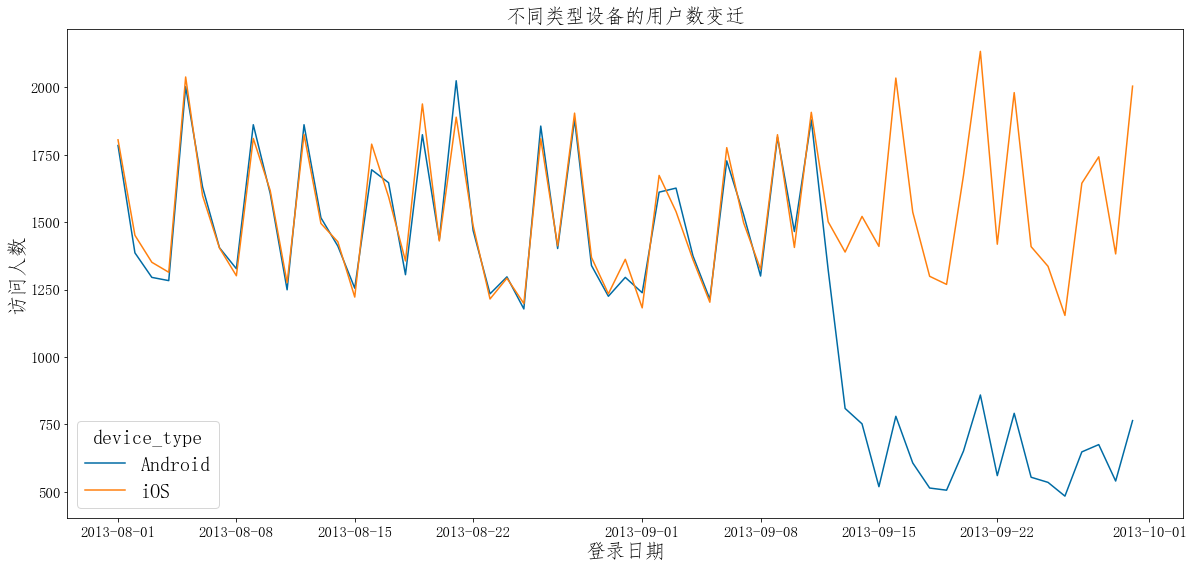

In [75]:
# 生成数据
dau_info['log_date'] = pd.to_datetime(dau_info['log_date'])
dau_info_pivot = dau_info.pivot_table(
    index='log_date', columns='device_type', values='user_id', aggfunc=np.count_nonzero)
x = dau_info_pivot.index
y1 = dau_info_pivot.loc[:, 'Android']
y2 = dau_info_pivot.loc[:, 'iOS']
# 开始折线画图
fontsize = 20
font = {'color': 'yellow',
        'size': fontsize
        }
plt.style.use("tableau-colorblind10")
plt.figure(figsize=(20, 9))
# 堆积柱状图
plt.plot(x, y1, label='Android')
plt.plot(x, y2, label='iOS')
# 添加图例
plt.legend(loc='best', fontsize=fontsize,
           title='device_type', title_fontsize=fontsize)
plt.title("不同类型设备的用户数变迁", fontsize=fontsize)
plt.xlabel("登录日期", fontsize=fontsize)
plt.ylabel("访问人数", fontsize=fontsize)
plt.xticks(fontsize=fontsize-5)
plt.yticks(fontsize=fontsize-5)
plt.show()

&#160; &#160;为了确定每种设备用户数在时间序列上的变化情况，我们利用时间序列图将数据可视化，并得出了显而易见的结论。上图的横轴表示访问日期，纵轴表示访问次数，两条曲线分别表示 iOS 和 Android 设备的访问次数随时间的变化情况。  
&#160; &#160;可以看出，iOS 的用户数和之前大体相同，而 Android 的用户数从9 月的第 2 周开始急剧减少。

## 解决对策

&#160; &#160;虽说本例是一种探索型数据分析，但在这种情况下，经常回顾事先提出的假设，确认数据分析的出发点，对提升工作效率也依然非常重要。在数据分析中，如果对数据进行深度考察，往往会没有止境，导致在不必要的分析上花费很多时间。为了防止这种情况的发生，重要的是在数据分析之前建立假设，并每次参照这个假设进行分析，那么我们再来看看本例中事先建立的假设。  
&#160; &#160;**1.《黑猫拼图》游戏的用户数量相比上月减少了 （事实）**  
&#160; &#160;**2. 某些用户群的用户数量减少了 （假设）**  
&#160; &#160;**3. 针对该用户群制定相应的措施，使用户数量回到和上月相同的水平 （解决方案）**  
&#160; &#160;根据上述假设，我们将之前数据分析的结果总结如下。  
&#160; &#160;**1.《黑猫拼图》游戏的用户数量相比上月减少了 （事实）**  
&#160; &#160;**2. 使用 Android 手机的用户群数量显著减少了 （事实）**  
&#160; &#160;**3. 弄清楚 Android 手机端的问题，并制定相应的改善策略，使用户数量回到和上月相同的水平 （确信度较高的解决方案）**  
&#160; &#160;根据分析的结果，和游戏开发部门确认后，得知 9 月 12 日 Android版应用进行了一次版本升级。给他们看了数据后，被告知已确认某些机型在测试中没有问题，但是不能确定旧的机型是否也能够通过测试。于是，我们将用户数减少的机型数据导出，并再度咨询他们的意见，发现这些机型的共同点是都安装了旧版本的 Android 系统。当这些机型中的应用升级后，用户就无法登录游戏了。于是，公司紧急修复了这个版本的系统。  
&#160; &#160;我们将整件事情向社交游戏事业本部的部长做了汇报，部长高兴地对我们的工作表示了感谢：“你们利用数据找出了问题的原因，还给出了具体的解决方案，真是非常感谢啊。”

## 小结
&#160; &#160;本章我们利用交叉列表统计进行了用户群的分析。  
&#160; &#160;我们抓住和上月相比用户数减少了这样一个问题，探究了这个问题的原因。同上一章一样，在进行数据分析之前，尽可能地听取了相关部门的意见，并掌握了一定的事实依据。但即便如此，也会有无法找出问题原因的情况。  
&#160; &#160;在本章的示例中，出现了不好的现象却无法找出原因，需要我们找出到底是哪里出了问题，这就是探索型数据分析。在验证过程中会伴随很多次失败的尝试，因此需要根据最初的假设，进一步深挖数据，不断探究问题的原因所在，这才是最重要的。  
&#160; &#160;另外，数据分析的委托方最好能够和数据分析师分享问题可能的原因，这样能够提高数据分析的效率，有助于早日解决问题。  

| 分析流程 | 第 4 章中数据分析的成本 |
| - | :-: | 
| 现状和预期 | 低 |
| 发现问题 | 中 |
| 数据的收集和加工 | 低 |
| 数据分析 | 高 |
| 解决对策 | 低 |

## 注：
&#160; &#160;本文文字内容主要来源于书籍：《数据分析实战》 [日] 酒卷隆志 里洋平/著 肖峰/译  
&#160; &#160;本文代码是自己手打的  
&#160; &#160;本文github地址：https://github.com/qq1044645270/data_analysis 